# 4. 梯度下降与方向传播：能改（下）

[bilibili 课程地址](https://www.bilibili.com/cheese/play/ep6911?csource=common_searchlecture_lecturecard_null)


## 课程要点

上一节中为了简化理解，忽略了偏置/截距这一下元素，这一节中我们需要添加这部分的信息。

`y = wx + b`

其中 `b` 就是偏置/截距。


单个神经元整体回顾： 梯度下降与方向传播

- 真实的数据情况：`y = w * x + b`
- 预测的数据情况：`y_pre = w_pre * x + b`
- 预测的方差代价函数： `e = (y_pre - (w * x + b))^2`

根据预测的代价函数去修正预测参数（权重）的过程被称作 **反向传播**。

![sgd](sgd.png)




## 代码实践

In [1]:
%pip install matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import dataset
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# 模拟数据集
data_size = 100
x_array, y_array = dataset.get_beans_b(data_size)
print(x_array)
print(y_array)

[0.00511123 0.01323872 0.01863879 0.02337917 0.0485089  0.06238117
 0.09269149 0.10238037 0.1054985  0.12125985 0.16516071 0.17477104
 0.18421596 0.18994744 0.19003719 0.21219903 0.22031539 0.23082809
 0.24157932 0.25681622 0.25813507 0.26538403 0.26830258 0.271228
 0.28502456 0.30946356 0.3112955  0.32115764 0.32239013 0.32402464
 0.3278815  0.33558202 0.35621623 0.37160394 0.38433028 0.38577175
 0.40196787 0.40785909 0.41512688 0.42740037 0.44171317 0.45008576
 0.4577306  0.46168965 0.46374438 0.46916821 0.48223305 0.49263728
 0.49310165 0.50752778 0.51705559 0.51886367 0.5254822  0.53910362
 0.54710443 0.54791007 0.54921266 0.54966822 0.54997499 0.56996313
 0.57620444 0.58166115 0.58320475 0.58675623 0.58893617 0.59116759
 0.59122378 0.60193299 0.60288483 0.61619887 0.63450994 0.63478454
 0.64013442 0.64286407 0.67318365 0.69491202 0.69534253 0.71320104
 0.71550023 0.72471561 0.73335035 0.75565291 0.77353197 0.78327405
 0.80223206 0.80345761 0.81282406 0.8350108  0.85441315 0.871710

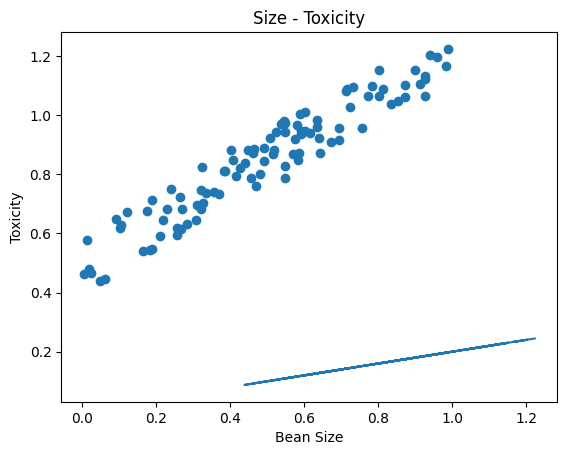

In [4]:
# 绘制豆豆大小和毒性关系的图表，带有偏置 B
plt.title("Size - Toxicity", fontsize = 12)
plt.xlabel("Bean Size")
plt.ylabel("Toxicity")

# 绘制豆豆的数据
plt.scatter(x_array, y_array)

# 权重，先设置一个默认值
weight = 0.2
y_pre = weight * y_array

# 绘制预测的数据
plt.plot(y_array,y_pre)
plt.show()


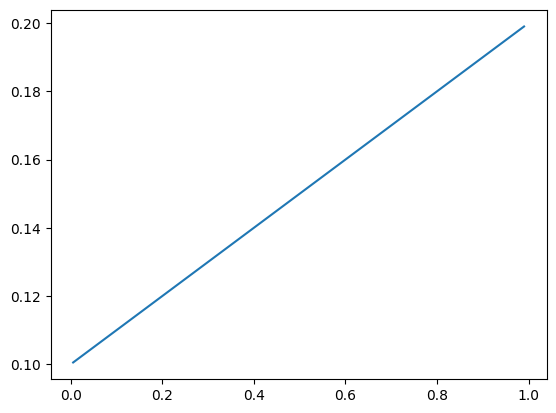

In [5]:
# y = w*a + b

w = 0.1
b = 0.1
y_pre = w * x_array + b

# 绘制预测的数据
plt.plot(x_array,y_pre)


In [43]:
# 执行后，matplotlib 会启动一个单独的窗口进行绘制
# %matplotlib osx

# 切回 notebook 中绘图
%matplotlib inline

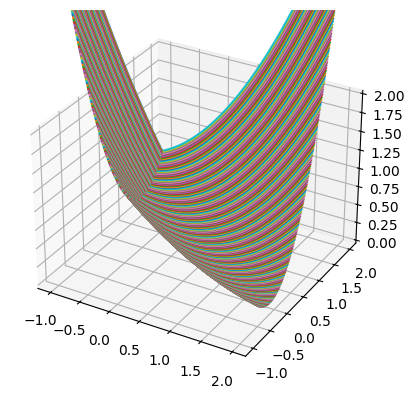

In [6]:
# y = w*a + b

fig = plt.figure()
# 创建一个 3D 坐标轴
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(0, 2)

weights_array = np.arange(-1, 2, 0.01)
biases_array = np.arange(-1, 2, 0.01)

for bisa in biases_array:
    e_array = []
    for weight in weights_array:
        y_pre = weight * x_array + bisa
        e = np.sum((y_array - y_pre)**2) / data_size
        e_array.append(e)
    # plt.plot(weights_array, e_array)
    ax.plot(weights_array, e_array, bisa, zdir="y")

plt.show()